# Třetí Úloha

## Načtení knihoven

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time


## Funkce pro tvorbu matice a vektoru

In [2]:
def create_matrix(n):
    matrix = np.array([[random.randint(0, 100) for i in range(n)] for j in range(n)])
    matrix[np.diag_indices_from(matrix)] = 1000
    return matrix
def create_vector(n):
    return np.array([random.randint(-10,10) for i in range(n)])

## Funkce pro Jacobiho Metodu

In [3]:
def jacobi_method(matrix, vector, iterations=5, x=None):
    if not x:
        x = np.ones(len(matrix))
    D = np.diag(matrix)
    L = np.tril(matrix, k = -1)
    U = np.triu(matrix, k = 1)
    for i in range(iterations):
        x = (vector - np.matmul((L + U), x)) / D
    return list(x)

## Výpočet

In [4]:
iteration_time = []
gauss_time = []
size = []

for i in range(1, 3000, 10):
    matrix= create_matrix(i)
    vector = create_vector(i)
    size.append(i)

    iteration_start = time.time()
    jacobi_method(matrix, vector)
    iteration_end = time.time()

    gauss_start = time.time()
    np.linalg.solve(matrix, vector)
    gauss_end = time.time()

    iteration_time.append(iteration_end - iteration_start)
    gauss_time.append(gauss_end - gauss_start)

## Graf

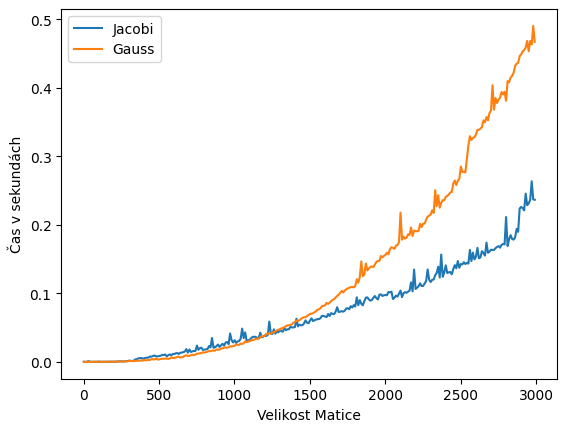

In [5]:
plt.plot(size, iteration_time, label="Jacobi")
plt.plot(size, gauss_time, label="Gauss")
plt.xlabel('Velikost Matice')
plt.ylabel('Čas v sekundách')
plt.legend()
plt.savefig('Časový_graf.png')
plt.show()